In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
path = 'data/wine_train.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,wine_ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type,target
0,2137,7.2,0.16,0.26,7.1,0.054,41.0,224.0,0.99660,3.38,0.55,10.1,0,5
1,2652,7.3,0.22,0.31,2.3,0.018,45.0,80.0,0.98936,3.06,0.34,12.9,0,7
2,1544,8.9,0.13,0.49,1.0,0.028,6.0,24.0,0.99260,2.91,0.32,9.9,0,5
3,3447,6.0,0.17,0.29,9.7,0.044,33.0,98.0,0.99536,3.12,0.36,9.2,0,6
4,1067,7.5,0.19,0.34,2.6,0.037,33.0,125.0,0.99230,3.10,0.49,11.1,0,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4547 entries, 0 to 4546
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   wine_ID               4547 non-null   int64  
 1   fixed acidity         4547 non-null   float64
 2   volatile acidity      4547 non-null   float64
 3   citric acid           4547 non-null   float64
 4   residual sugar        4547 non-null   float64
 5   chlorides             4547 non-null   float64
 6   free sulfur dioxide   4547 non-null   float64
 7   total sulfur dioxide  4547 non-null   float64
 8   density               4547 non-null   float64
 9   pH                    4547 non-null   float64
 10  sulphates             4547 non-null   float64
 11  alcohol               4547 non-null   float64
 12  wine_type             4547 non-null   int64  
 13  target                4547 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 497.5 KB


In [5]:
print(df.shape)
print("--------------------")
print(df.columns)
print("--------------------")
print(df.describe())

(4547, 14)
--------------------
Index(['wine_ID', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'wine_type', 'target'],
      dtype='object')
--------------------
           wine_ID  fixed acidity  volatile acidity  citric acid  \
count  4547.000000    4547.000000       4547.000000  4547.000000   
mean   3249.257313       7.235364          0.340110     0.318155   
std    1882.272944       1.319966          0.166643     0.142942   
min       0.000000       3.800000          0.080000     0.000000   
25%    1618.500000       6.400000          0.230000     0.250000   
50%    3227.000000       7.000000          0.290000     0.310000   
75%    4896.500000       7.700000          0.400000     0.390000   
max    6495.000000      15.600000          1.580000     1.000000   

       residual sugar    chlorides  free sulfur dioxide  total sulfur dioxide 

In [7]:
numerical_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                      'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [8]:
df['target'].value_counts()

target
6    1997
5    1475
7     761
4     151
8     135
3      23
9       5
Name: count, dtype: int64

In [9]:
df.isnull().sum()

wine_ID                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
wine_type               0
target                  0
dtype: int64

In [10]:
df.drop('wine_ID', axis=1, inplace=True)

<Axes: >

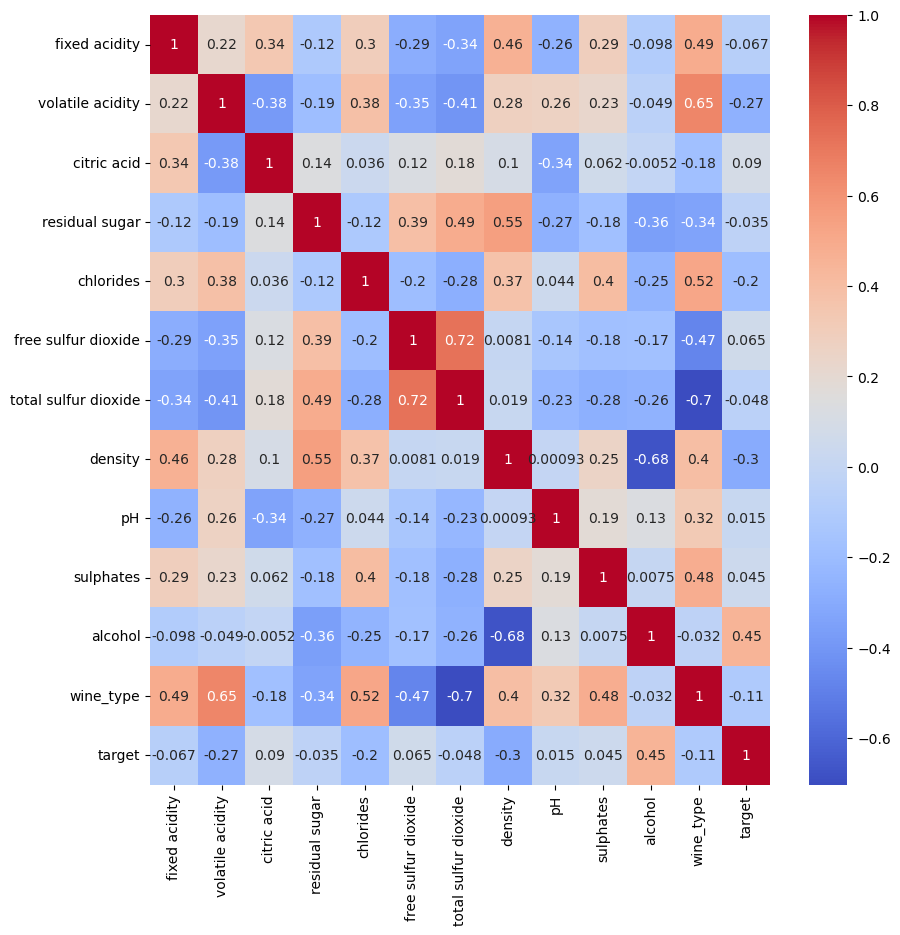

In [11]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [12]:
X = df.drop('target', axis=1)
y = df['target']

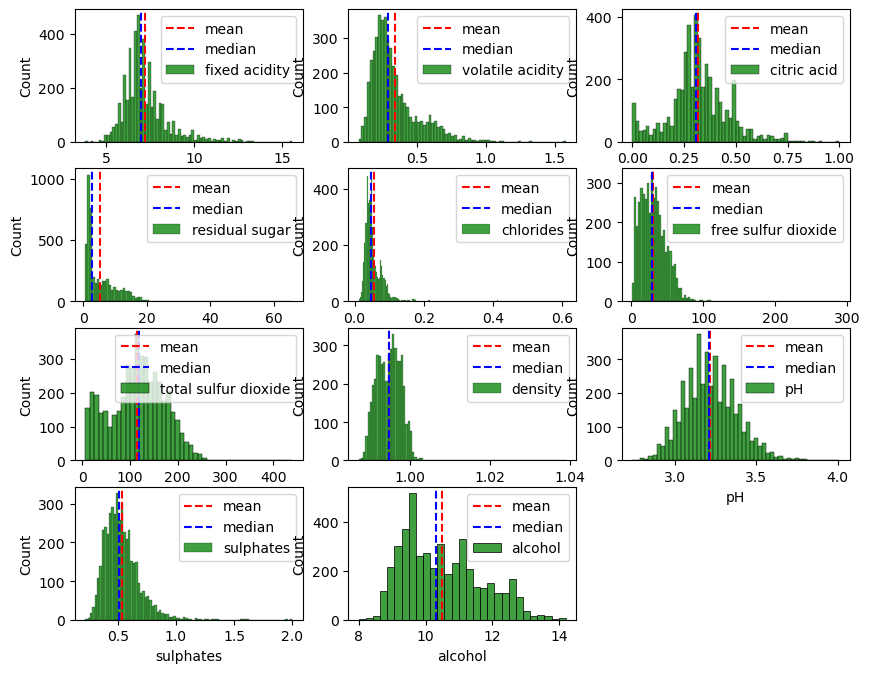

In [14]:
fig = plt.figure(figsize=(10, 10))
for i in range(len(X[numerical_features].columns)):
    fig.add_subplot(5, 3, i+1)
    sns.histplot(X[numerical_features].iloc[:, i], color='green', label=X.columns[i])
    # show the mean and median
    plt.axvline(X[numerical_features].iloc[:, i].mean(), linestyle='dashed', color='red', label='mean')
    plt.axvline(X[numerical_features].iloc[:, i].median(), linestyle='dashed', color='blue', label='median')
    plt.legend()

(array([  23.,    0.,    0.,  151.,    0.,    0., 1475.,    0.,    0.,
           0., 1997.,    0.,    0.,  761.,    0.,    0.,  135.,    0.,
           0.,    5.]),
 array([3. , 3.3, 3.6, 3.9, 4.2, 4.5, 4.8, 5.1, 5.4, 5.7, 6. , 6.3, 6.6,
        6.9, 7.2, 7.5, 7.8, 8.1, 8.4, 8.7, 9. ]),
 <BarContainer object of 20 artists>)

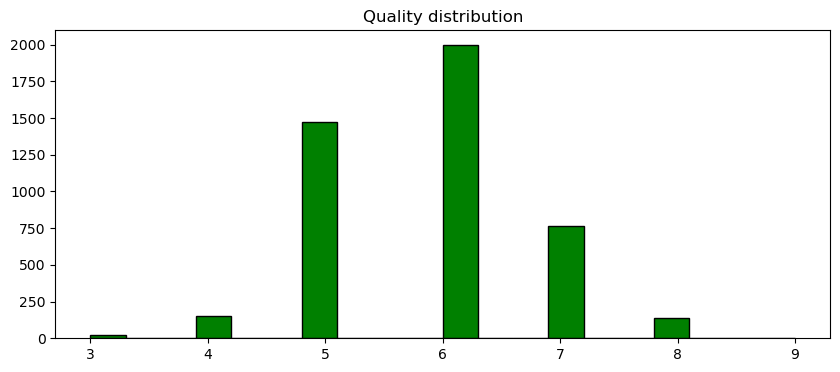

In [41]:
plt.figure(figsize=(10, 4))
plt.title('Quality distribution')
plt.hist(y, bins=20, color='green', edgecolor='black')

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

## Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(r2_score(y_test, y_pred))

0.31196724892924044


In [49]:
res = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

## CatBoost

In [54]:
from catboost import CatBoostRegressor, Pool

In [64]:
train_pool = Pool(X_train, y_train)
test_pool = Pool(X_test, y_test)
model = CatBoostRegressor(iterations=4000, depth=10, learning_rate=0.1, loss_function='MAE', eval_metric='R2', random_seed=42)
model.fit(train_pool, eval_set=test_pool, verbose=1)

0:	learn: 0.0434123	test: 0.0214227	best: 0.0214227 (0)	total: 2.16ms	remaining: 8.64s
1:	learn: 0.1021201	test: 0.0653663	best: 0.0653663 (1)	total: 17ms	remaining: 33.9s
2:	learn: 0.1538687	test: 0.1164887	best: 0.1164887 (2)	total: 22.4ms	remaining: 29.9s
3:	learn: 0.1985999	test: 0.1539993	best: 0.1539993 (3)	total: 26.8ms	remaining: 26.8s
4:	learn: 0.2427038	test: 0.1920764	best: 0.1920764 (4)	total: 32ms	remaining: 25.5s
5:	learn: 0.2767052	test: 0.2136834	best: 0.2136834 (5)	total: 37.7ms	remaining: 25.1s
6:	learn: 0.3070506	test: 0.2389920	best: 0.2389920 (6)	total: 42.3ms	remaining: 24.2s
7:	learn: 0.3315668	test: 0.2573851	best: 0.2573851 (7)	total: 46.7ms	remaining: 23.3s
8:	learn: 0.3518789	test: 0.2714336	best: 0.2714336 (8)	total: 51.4ms	remaining: 22.8s
9:	learn: 0.3756160	test: 0.2856179	best: 0.2856179 (9)	total: 55.3ms	remaining: 22.1s
10:	learn: 0.3981177	test: 0.2981064	best: 0.2981064 (10)	total: 59.2ms	remaining: 21.5s
11:	learn: 0.4076823	test: 0.3059410	best: 0.

## Random Forest

In [66]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=150, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(r2_score(y_test, y_pred))

0.4840267610549923


## Regression Lasso

In [25]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

print(r2_score(y_test, y_pred))

0.2387448018091638


## Regression Ridge

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.5, random_state=42)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

print(r2_score(y_test, y_pred))

## Neural Network

In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

In [30]:
trainset = TensorDataset(torch.tensor(X_train.values, dtype=torch.float32), torch.tensor(y_train.values, dtype=torch.float32))
testset = TensorDataset(torch.tensor(X_test.values, dtype=torch.float32), torch.tensor(y_test.values, dtype=torch.float32))

In [33]:
for x, y in trainset:
    print(x, y)
    break

tensor([6.2000e+00, 2.8000e-01, 4.5000e-01, 7.5000e+00, 4.5000e-02, 4.6000e+01,
        2.0300e+02, 9.9573e-01, 3.2600e+00, 4.6000e-01, 9.2000e+00, 0.0000e+00]) tensor(6.)


In [34]:
class NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(12, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 1)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

In [76]:
model = NN()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

trainloader = DataLoader(trainset, batch_size=32, shuffle=True)
testloader = DataLoader(testset, batch_size=32, shuffle=False)

epochs = 3000
losses = []

for epoch in range(epochs):
    for x, y in trainloader:
        optimizer.zero_grad()
        y_pred = model(x)
        loss = criterion(y_pred, y.unsqueeze(1))
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    with torch.no_grad():
        test_pred = model(torch.tensor(X_test.values, dtype=torch.float32))
        test_loss = criterion(test_pred, torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1))
    print(f'Epoch: {epoch}, Loss: {loss.item()}, Test Loss: {test_loss.item()}')

Epoch: 0, Loss: 1.2655385732650757, Test Loss: 1.81076979637146
Epoch: 1, Loss: 0.6080650687217712, Test Loss: 1.007081389427185
Epoch: 2, Loss: 0.631310224533081, Test Loss: 0.8578647971153259
Epoch: 3, Loss: 0.6110283732414246, Test Loss: 0.7640967965126038
Epoch: 4, Loss: 0.27648651599884033, Test Loss: 0.7765882611274719
Epoch: 5, Loss: 0.77321457862854, Test Loss: 1.1165903806686401
Epoch: 6, Loss: 0.7258472442626953, Test Loss: 0.6741715669631958
Epoch: 7, Loss: 0.4173634648323059, Test Loss: 0.6326777338981628
Epoch: 8, Loss: 0.47232452034950256, Test Loss: 0.7995910048484802
Epoch: 9, Loss: 0.5655719637870789, Test Loss: 0.6593998670578003
Epoch: 10, Loss: 0.5390191078186035, Test Loss: 0.6553062796592712
Epoch: 11, Loss: 0.8723405599594116, Test Loss: 0.616157591342926
Epoch: 12, Loss: 0.26797670125961304, Test Loss: 0.6203244924545288
Epoch: 13, Loss: 0.8405153751373291, Test Loss: 0.7113379836082458
Epoch: 14, Loss: 0.4380982220172882, Test Loss: 0.6287750601768494
Epoch: 15

In [77]:
all_res = pd.DataFrame({'y_test': y_test, 'y_pred': test_pred.ravel()})

In [78]:
all_res[all_res['y_test']==3]

,y_test,y_pred
3084,3,6.378499
2327,3,5.392218
3589,3,4.755383
3493,3,5.845180
2740,3,5.444517
1772,3,5.035906
3271,3,9.279863


In [81]:
y_train.value_counts()

target
6    1495
5    1086
7     587
4     118
8     104
3      16
9       4
Name: count, dtype: int64

In [82]:
y_test.value_counts()

target
6    502
5    389
7    174
4     33
8     31
3      7
9      1
Name: count, dtype: int64

In [83]:
df['target'].value_counts()

target
6    1997
5    1475
7     761
4     151
8     135
3      23
9       5
Name: count, dtype: int64